## Method 1: Convert them to existing formats (COCO format or PASCAL format)

In [49]:
import json

with open('small_coco/instances_train2017_small.json', 'r') as f:
    data = json.load(f)

annotation json files in COCO format should have 'images', 'annotations', 'categories' keys

In [50]:
data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

You can use CocoDataset class to build dataset afterwards.

In [52]:
from mmdet.datasets import CocoDataset

dataset = CocoDataset(classes=[cat['name'] for cat in data['categories']],
                      ann_file ='small_coco/instances_train2017_small.json',
                      img_prefix='small_coco/train_2017_small',
                      pipeline = [])

dataset[0]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


{'img_info': {'license': 3,
  'file_name': '000000391895.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
  'height': 360,
  'width': 640,
  'date_captured': '2013-11-14 11:18:45',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'id': 391895,
  'filename': '000000391895.jpg'},
 'ann_info': {'bboxes': array([[359.17, 146.17, 471.62, 359.74],
         [339.88,  22.16, 493.76, 322.89],
         [471.64, 172.82, 507.56, 220.92],
         [486.01, 183.31, 516.64, 218.29]], dtype=float32),
  'labels': array([3, 0, 0, 1]),
  'bboxes_ignore': array([], shape=(0, 4), dtype=float32),
  'masks': [None, None, None, None],
  'seg_map': '000000391895.png'},
 'img_prefix': 'small_coco/train_2017_small',
 'seg_prefix': None,
 'proposal_file': None,
 'bbox_fields': [],
 'mask_fields': [],
 'seg_fields': []}

You may add following pipelines to further process the data.

### 1. LoadImagesFromFile

literally load image from `img_prefix`, `file_name`. Image is loaded as (H, W, C) shape numpy array in BGR format 

In [55]:
from mmdet.datasets.pipelines import LoadImageFromFile

dataset = CocoDataset(classes=[cat['name'] for cat in annos['categories']],
                      ann_file ='small_coco/instances_train2017_small.json',
                      img_prefix='small_coco/train_2017_small',
                      pipeline = [LoadImageFromFile()])

dataset[0]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


{'img_info': {'license': 3,
  'file_name': '000000391895.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
  'height': 360,
  'width': 640,
  'date_captured': '2013-11-14 11:18:45',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'id': 391895,
  'filename': '000000391895.jpg'},
 'ann_info': {'bboxes': array([[359.17, 146.17, 471.62, 359.74],
         [339.88,  22.16, 493.76, 322.89],
         [471.64, 172.82, 507.56, 220.92],
         [486.01, 183.31, 516.64, 218.29]], dtype=float32),
  'labels': array([3, 0, 0, 1]),
  'bboxes_ignore': array([], shape=(0, 4), dtype=float32),
  'masks': [None, None, None, None],
  'seg_map': '000000391895.png'},
 'img_prefix': 'small_coco/train_2017_small',
 'seg_prefix': None,
 'proposal_file': None,
 'bbox_fields': [],
 'mask_fields': [],
 'seg_fields': [],
 'filename': 'small_coco/train_2017_small/000000391895.jpg',
 'ori_filename': '000000391895.jpg',
 'img': array([[[255, 255, 255],


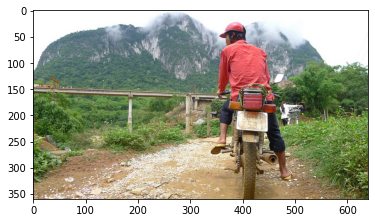

In [57]:
import matplotlib.pyplot as plt

plt.imshow(dataset[0]['img'][...,::-1])
plt.show()

### LoadAnnotations

Load annotataions. `gt_bboxes` and `'gt_labels' are generated. 

In [58]:
from mmdet.datasets.pipelines import LoadAnnotations

dataset = CocoDataset(classes=[cat['name'] for cat in annos['categories']],
                      ann_file ='small_coco/instances_train2017_small.json',
                      img_prefix='small_coco/train_2017_small',
                      pipeline = [LoadImageFromFile(), LoadAnnotations()])

dataset[0]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


{'img_info': {'license': 3,
  'file_name': '000000391895.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
  'height': 360,
  'width': 640,
  'date_captured': '2013-11-14 11:18:45',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'id': 391895,
  'filename': '000000391895.jpg'},
 'ann_info': {'bboxes': array([[359.17, 146.17, 471.62, 359.74],
         [339.88,  22.16, 493.76, 322.89],
         [471.64, 172.82, 507.56, 220.92],
         [486.01, 183.31, 516.64, 218.29]], dtype=float32),
  'labels': array([3, 0, 0, 1]),
  'bboxes_ignore': array([], shape=(0, 4), dtype=float32),
  'masks': [None, None, None, None],
  'seg_map': '000000391895.png'},
 'img_prefix': 'small_coco/train_2017_small',
 'seg_prefix': None,
 'proposal_file': None,
 'bbox_fields': ['gt_bboxes_ignore', 'gt_bboxes'],
 'mask_fields': [],
 'seg_fields': [],
 'filename': 'small_coco/train_2017_small/000000391895.jpg',
 'ori_filename': '000000391895.jpg',
 '

### 3. Resize

Resize image.  
When img_scale is list, then scale is randomly selected from the list if `multiscale_mode='value'`.  
If `multiscale_mode='range'`, then the scale is randomly sampled from the given range.

In [83]:
from mmdet.datasets.pipelines import Resize

dataset = CocoDataset(classes=[cat['name'] for cat in annos['categories']],
                      ann_file ='small_coco/instances_train2017_small.json',
                      img_prefix='small_coco/train_2017_small',
                      pipeline = [LoadImageFromFile(),
                                  LoadAnnotations(),
                                  Resize(img_scale=[(256, 256), (512, 512)], keep_ratio=True, multiscale_mode='value')])

dataset[0]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


{'img_info': {'license': 3,
  'file_name': '000000391895.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
  'height': 360,
  'width': 640,
  'date_captured': '2013-11-14 11:18:45',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'id': 391895,
  'filename': '000000391895.jpg'},
 'ann_info': {'bboxes': array([[359.17, 146.17, 471.62, 359.74],
         [339.88,  22.16, 493.76, 322.89],
         [471.64, 172.82, 507.56, 220.92],
         [486.01, 183.31, 516.64, 218.29]], dtype=float32),
  'labels': array([3, 0, 0, 1]),
  'bboxes_ignore': array([], shape=(0, 4), dtype=float32),
  'masks': [None, None, None, None],
  'seg_map': '000000391895.png'},
 'img_prefix': 'small_coco/train_2017_small',
 'seg_prefix': None,
 'proposal_file': None,
 'bbox_fields': ['gt_bboxes_ignore', 'gt_bboxes'],
 'mask_fields': [],
 'seg_fields': [],
 'filename': 'small_coco/train_2017_small/000000391895.jpg',
 'ori_filename': '000000391895.jpg',
 '

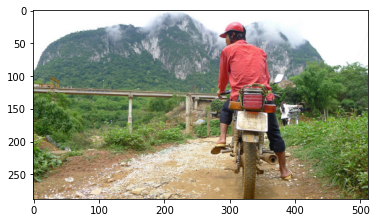

In [80]:
plt.imshow(dataset[0]['img'][...,::-1])
plt.show()

### 4. RandomFlip

In [88]:
from mmdet.datasets.pipelines import RandomFlip

dataset = CocoDataset(classes=[cat['name'] for cat in annos['categories']],
                      ann_file ='small_coco/instances_train2017_small.json',
                      img_prefix='small_coco/train_2017_small',
                      pipeline = [LoadImageFromFile(),
                                  LoadAnnotations(),
                                  RandomFlip(flip_ratio=1.0)])

dataset[0]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


{'img_info': {'license': 3,
  'file_name': '000000391895.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
  'height': 360,
  'width': 640,
  'date_captured': '2013-11-14 11:18:45',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'id': 391895,
  'filename': '000000391895.jpg'},
 'ann_info': {'bboxes': array([[359.17, 146.17, 471.62, 359.74],
         [339.88,  22.16, 493.76, 322.89],
         [471.64, 172.82, 507.56, 220.92],
         [486.01, 183.31, 516.64, 218.29]], dtype=float32),
  'labels': array([3, 0, 0, 1]),
  'bboxes_ignore': array([], shape=(0, 4), dtype=float32),
  'masks': [None, None, None, None],
  'seg_map': '000000391895.png'},
 'img_prefix': 'small_coco/train_2017_small',
 'seg_prefix': None,
 'proposal_file': None,
 'bbox_fields': ['gt_bboxes_ignore', 'gt_bboxes'],
 'mask_fields': [],
 'seg_fields': [],
 'filename': 'small_coco/train_2017_small/000000391895.jpg',
 'ori_filename': '000000391895.jpg',
 '

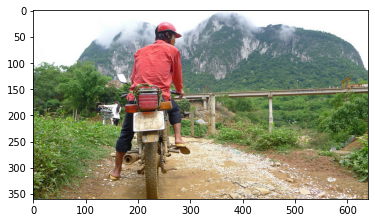

In [89]:
plt.imshow(dataset[0]['img'][...,::-1])
plt.show()

### 5. Normalize

noramlize img array.  
if `to_rgb=True`, img is converted from bgr to rgb before normalization

In [90]:
from mmdet.datasets.pipelines import Normalize

dataset = CocoDataset(classes=[cat['name'] for cat in annos['categories']],
                      ann_file ='small_coco/instances_train2017_small.json',
                      img_prefix='small_coco/train_2017_small',
                      pipeline = [LoadImageFromFile(),
                                  LoadAnnotations(),
                                  Normalize(mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)])

dataset[0]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


{'img_info': {'license': 3,
  'file_name': '000000391895.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
  'height': 360,
  'width': 640,
  'date_captured': '2013-11-14 11:18:45',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'id': 391895,
  'filename': '000000391895.jpg'},
 'ann_info': {'bboxes': array([[359.17, 146.17, 471.62, 359.74],
         [339.88,  22.16, 493.76, 322.89],
         [471.64, 172.82, 507.56, 220.92],
         [486.01, 183.31, 516.64, 218.29]], dtype=float32),
  'labels': array([3, 0, 0, 1]),
  'bboxes_ignore': array([], shape=(0, 4), dtype=float32),
  'masks': [None, None, None, None],
  'seg_map': '000000391895.png'},
 'img_prefix': 'small_coco/train_2017_small',
 'seg_prefix': None,
 'proposal_file': None,
 'bbox_fields': ['gt_bboxes_ignore', 'gt_bboxes'],
 'mask_fields': [],
 'seg_fields': [],
 'filename': 'small_coco/train_2017_small/000000391895.jpg',
 'ori_filename': '000000391895.jpg',
 '

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


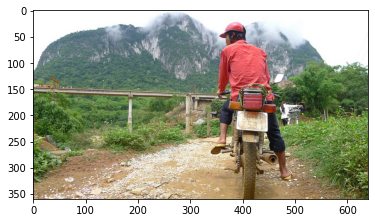

In [122]:
data_sample = dataset[0]
img_norm_cfg = data_sample['img_norm_cfg']

img = data_sample['img']*img_norm_cfg['std'] + img_norm_cfg['mean']
plt.imshow(img/255)
plt.show()

### 6. Pad

Pad the image. Default pad value is 0.  
Use `size` to pad to fixed size, or `size_divisor` to pad to the minimum size that is divisible by some number

In [136]:
from mmdet.datasets.pipelines import Pad

dataset = CocoDataset(classes=[cat['name'] for cat in annos['categories']],
                      ann_file ='small_coco/instances_train2017_small.json',
                      img_prefix='small_coco/train_2017_small',
                      pipeline = [LoadImageFromFile(),
                                  LoadAnnotations(),
                                  Pad(size_divisor=100)])
dataset[0]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


{'img_info': {'license': 3,
  'file_name': '000000391895.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
  'height': 360,
  'width': 640,
  'date_captured': '2013-11-14 11:18:45',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'id': 391895,
  'filename': '000000391895.jpg'},
 'ann_info': {'bboxes': array([[359.17, 146.17, 471.62, 359.74],
         [339.88,  22.16, 493.76, 322.89],
         [471.64, 172.82, 507.56, 220.92],
         [486.01, 183.31, 516.64, 218.29]], dtype=float32),
  'labels': array([3, 0, 0, 1]),
  'bboxes_ignore': array([], shape=(0, 4), dtype=float32),
  'masks': [None, None, None, None],
  'seg_map': '000000391895.png'},
 'img_prefix': 'small_coco/train_2017_small',
 'seg_prefix': None,
 'proposal_file': None,
 'bbox_fields': ['gt_bboxes_ignore', 'gt_bboxes'],
 'mask_fields': [],
 'seg_fields': [],
 'filename': 'small_coco/train_2017_small/000000391895.jpg',
 'ori_filename': '000000391895.jpg',
 '

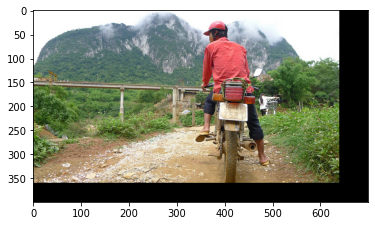

In [137]:
plt.imshow(dataset[0]['img'][...,::-1])
plt.show()

### 7. DefaultFormatBundle

Add default meta keys (ex: scale, pad_shape, ...)  
Common fields are formatted as follows.  

- img: (1) transpose, (2) to tensor, (3) to DataContainer (stack=True)
- gt_bboxes: (1) to tensor, (2) to DataContainer
- gt_labels: (1) to tensor, (2) to DataContainer

In [131]:
from mmdet.datasets.pipelines import DefaultFormatBundle

dataset = CocoDataset(classes=[cat['name'] for cat in annos['categories']],
                      ann_file ='small_coco/instances_train2017_small.json',
                      img_prefix='small_coco/train_2017_small',
                      pipeline = [LoadImageFromFile(),
                                  LoadAnnotations(),
                                  Normalize(mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True),
                                  DefaultFormatBundle()])

dataset[0]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


{'img_info': {'license': 3,
  'file_name': '000000391895.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
  'height': 360,
  'width': 640,
  'date_captured': '2013-11-14 11:18:45',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'id': 391895,
  'filename': '000000391895.jpg'},
 'ann_info': {'bboxes': array([[359.17, 146.17, 471.62, 359.74],
         [339.88,  22.16, 493.76, 322.89],
         [471.64, 172.82, 507.56, 220.92],
         [486.01, 183.31, 516.64, 218.29]], dtype=float32),
  'labels': array([3, 0, 0, 1]),
  'bboxes_ignore': array([], shape=(0, 4), dtype=float32),
  'masks': [None, None, None, None],
  'seg_map': '000000391895.png'},
 'img_prefix': 'small_coco/train_2017_small',
 'seg_prefix': None,
 'proposal_file': None,
 'bbox_fields': ['gt_bboxes_ignore', 'gt_bboxes'],
 'mask_fields': [],
 'seg_fields': [],
 'filename': 'small_coco/train_2017_small/000000391895.jpg',
 'ori_filename': '000000391895.jpg',
 '

### 8. Collect

Collect specific keys and meta datas needed.

In [139]:
from mmdet.datasets.pipelines import Collect

dataset = CocoDataset(classes=[cat['name'] for cat in annos['categories']],
                      ann_file ='small_coco/instances_train2017_small.json',
                      img_prefix='small_coco/train_2017_small',
                      pipeline = [LoadImageFromFile(),
                                  LoadAnnotations(),
                                  RandomFlip(flip_ratio=0.5),
                                  Normalize(mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True),
                                  DefaultFormatBundle(),
                                  Collect(keys=['img', 'gt_bboxes', 'gt_labels'])])

dataset[0]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


{'img_metas': DataContainer({'filename': 'small_coco/train_2017_small/000000391895.jpg', 'ori_filename': '000000391895.jpg', 'ori_shape': (360, 640, 3), 'img_shape': (360, 640, 3), 'pad_shape': (360, 640, 3), 'scale_factor': 1.0, 'flip': True, 'flip_direction': 'horizontal', 'img_norm_cfg': {'mean': array([123.675, 116.28 , 103.53 ], dtype=float32), 'std': array([58.395, 57.12 , 57.375], dtype=float32), 'to_rgb': True}}),
 'img': DataContainer(tensor([[[ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          ...,
          [-1.4329, -1.1760, -1.1760,  ...,  0.8276,  0.1254,  0.6906],
          [-0.9877, -0.8678, -0.8849,  ...,  0.4508,  0.3138,  1.3242],
          [-1.0904, -1.1760, -1.3130,  ...,  1.1015,  1.3242,  0.8961]],
 
         [[ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          [ 2.4286,  2.4286,  2